# Анализ зависимости метрик от параметров BM25-модели

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import typing

os.environ['DIR'] = '/home/ml/softezza_ml'

## @10 метрики

In [2]:
grid_data_10 = pd.DataFrame()

if os.path.exists(os.path.join(os.environ['DIR'], 'reports/grid_report_bm25_1.csv')):
    grid_data_10 = pd.concat([grid_data_10, pd.read_csv('reports/grid_report_bm25_1.csv')])

if os.path.exists(os.path.join(os.environ['DIR'], 'reports/grid_report_bm25_2.csv')):
    grid_data_10 = pd.concat([grid_data_10, pd.read_csv('reports/grid_report_bm25_2.csv')])

grid_data_10 = grid_data_10.drop_duplicates(subset=['model', 'K', 'B', 'K1']).reset_index(drop=True).sort_values(['RecallNoPop@10', 'PopInt@10', 'Recall@10', 'MAP@10'], ascending=[False, True, False, False])
grid_data_10 = grid_data_10[grid_data_10['model'] == 'bm25']

(
    grid_data_10.sort_values(['RecallNoPop@10', 'PopInt@10', 'MAP@10'], ascending=[False, True, False])
        .head(100)
        .style.text_gradient(
            axis=0,
            cmap='PiYG',
            subset=['Recall@10', 'MAP@10', 'MIUF@10', 'Siren@10', 'PopInt@10', 'RecallNoPop@10']
        )
)

,Recall@10,MAP@10,MIUF@10,Siren@10,PopInt@10,RecallNoPop@10,model,K,B,K1
14,0.066071,0.023467,5.800231,0.000416,0.061300,0.054145,bm25,225,0.450000,1.200000
11,0.065474,0.023329,5.806622,0.000416,0.060402,0.053960,bm25,200,0.450000,1.200000
15,0.065160,0.023177,5.831481,0.000420,0.059382,0.053754,bm25,225,0.450000,1.250000
12,0.064641,0.023044,5.837801,0.000420,0.058597,0.053613,bm25,200,0.450000,1.250000
16,0.064378,0.022911,5.860953,0.000422,0.057520,0.053464,bm25,225,0.450000,1.300000
8,0.064859,0.023217,5.814385,0.000417,0.059934,0.053367,bm25,175,0.450000,1.200000
13,0.063873,0.022782,5.867085,0.000423,0.056973,0.053243,bm25,200,0.450000,1.300000
9,0.064132,0.022980,5.845282,0.000420,0.058325,0.053042,bm25,175,0.450000,1.250000
10,0.063475,0.022758,5.874949,0.000423,0.056357,0.052793,bm25,175,0.450000,1.300000
23,0.060875,0.021717,5.996444,0.000437,0.050108,0.051998,bm25,225,0.500000,1.200000


Корреляции

In [3]:
grid_data_10[['Recall@10', 'MAP@10', 'MIUF@10', 'Siren@10', 'PopInt@10', 'RecallNoPop@10', 'B', 'K', 'K1']].corr()

,Recall@10,MAP@10,MIUF@10,Siren@10,PopInt@10,RecallNoPop@10,B,K,K1
Recall@10,1.000000,0.999163,-0.998631,-0.997824,0.998034,0.996751,-9.835425e-01,7.390215e-02,-1.599561e-01
MAP@10,0.999163,1.000000,-0.999286,-0.998862,0.999394,0.992976,-9.850594e-01,3.979598e-02,-1.596866e-01
MIUF@10,-0.998631,-0.999286,1.000000,0.999852,-0.998163,-0.993714,9.861502e-01,-3.008688e-02,1.620201e-01
Siren@10,-0.997824,-0.998862,0.999852,1.000000,-0.997781,-0.992412,9.867007e-01,-1.917161e-02,1.601064e-01
PopInt@10,0.998034,0.999394,-0.998163,-0.997781,1.000000,0.990437,-9.834927e-01,3.629833e-02,-1.603680e-01
RecallNoPop@10,0.996751,0.992976,-0.993714,-0.992412,0.990437,1.000000,-9.779296e-01,1.287215e-01,-1.580694e-01
B,-0.983542,-0.985059,0.986150,0.986701,-0.983493,-0.977930,1.000000e+00,2.368476e-16,-9.830100e-16
K,0.073902,0.039796,-0.030087,-0.019172,0.036298,0.128721,2.368476e-16,1.000000e+00,2.368476e-16
K1,-0.159956,-0.159687,0.162020,0.160106,-0.160368,-0.158069,-9.830100e-16,2.368476e-16,1.000000e+00


### Графики зависимости метрик от параметров bm25-модели

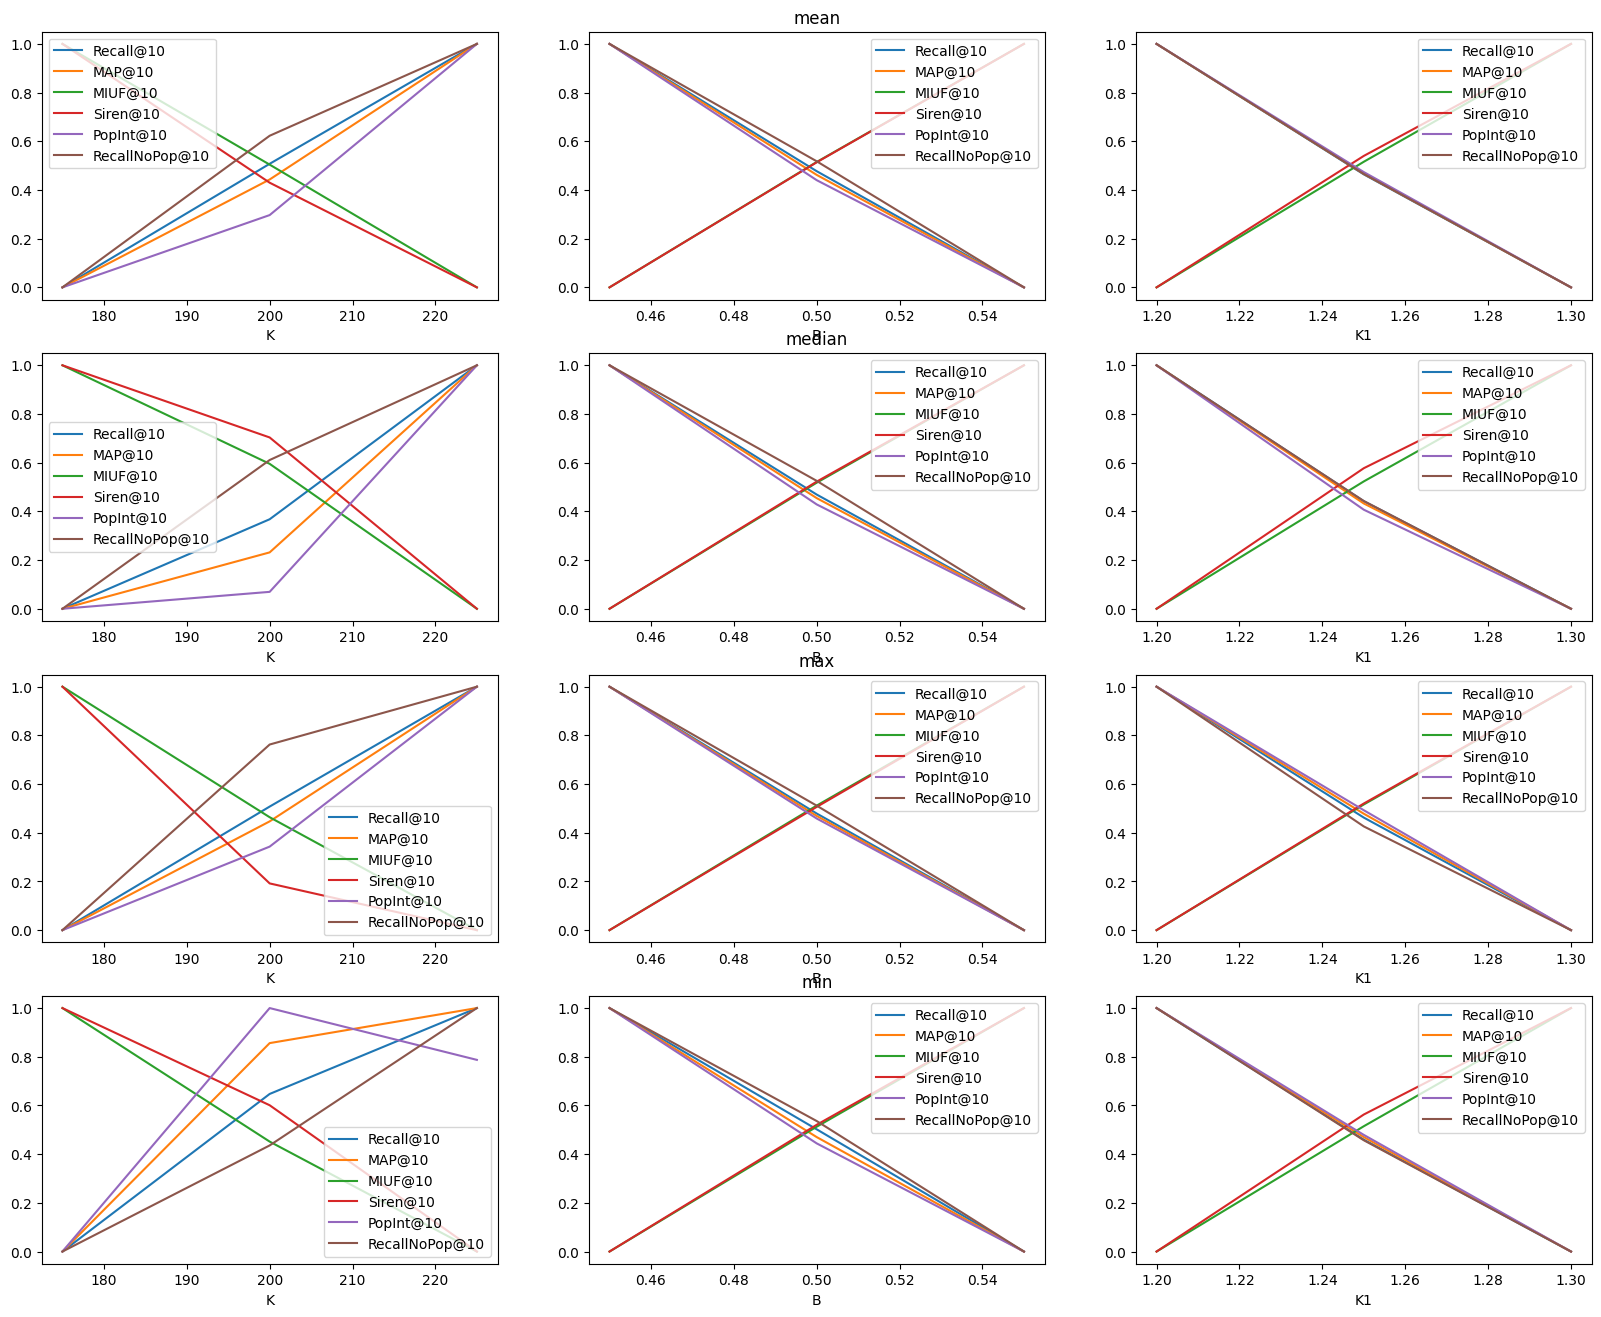

In [4]:
fig, axis = plt.subplots(4, 3)
fig.set_size_inches(20, 16)

def norm_series(x):
    return (x-x.min())/(x.max()-x.min())

def get_dots(col: str, agg_func: typing.Callable = np.mean):
    return grid_data_10.groupby(col).agg(agg_func)


for i, f in enumerate(['mean', 'median', 'max', 'min']):
    axis[i][1].set_title(f)

    for j, p in enumerate(['K', 'B', 'K1']):

        for m in ['Recall@10', 'MAP@10', 'MIUF@10', 'Siren@10', 'PopInt@10', 'RecallNoPop@10']:
            dots = get_dots(p, f)
            axis[i][j].plot(dots.index, norm_series(dots[m]), label=m)
            axis[i][j].set_xlabel(p)
            axis[i][j].legend();

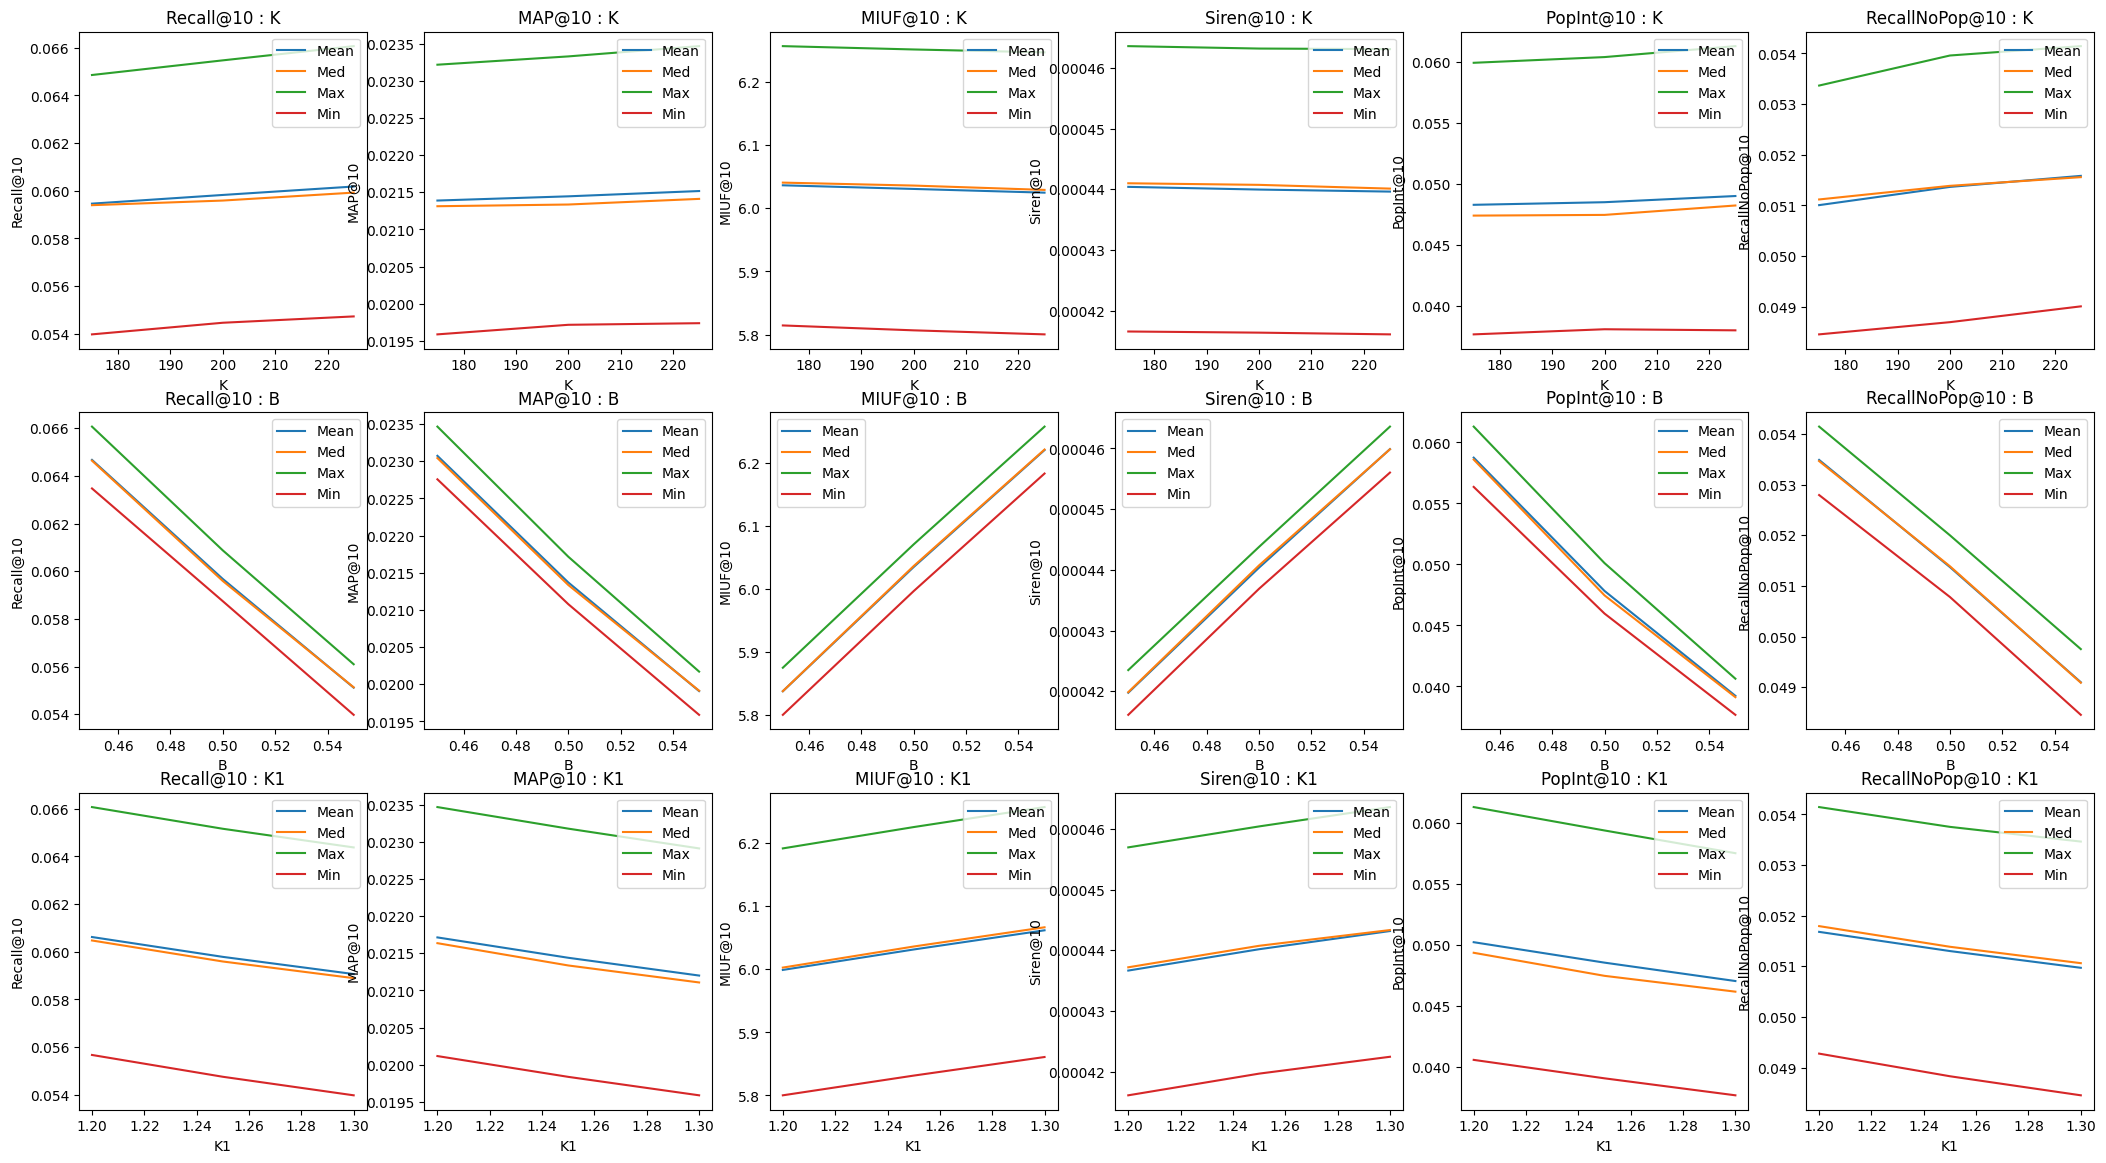

In [5]:
fig, axis = plt.subplots(3, 6)
fig.set_size_inches(26, 14)

for i, p in enumerate(
    ['K', 'B', 'K1']
):
    for j, m in enumerate(['Recall@10', 'MAP@10', 'MIUF@10', 'Siren@10', 'PopInt@10', 'RecallNoPop@10']):
        mean_dots = get_dots(p, 'mean')
        med_dots = get_dots(p, 'median')
        max_dots = get_dots(p, 'max')
        min_dots = get_dots(p, 'min')

        axis[i][j].set_title(f"{m} : {p}")
        axis[i][j].set_xlabel(p)
        axis[i][j].set_ylabel(m)

        axis[i][j].plot(mean_dots.index, mean_dots[m], label='Mean')
        axis[i][j].plot(med_dots.index, med_dots[m], label='Med')
        axis[i][j].plot(max_dots.index, max_dots[m], label='Max')
        axis[i][j].plot(min_dots.index, min_dots[m], label='Min')

        axis[i][j].legend();

## @10 метрики c реранжированием

In [6]:
grid_data_10r = pd.read_csv('reports/grid_report_bm25_3.csv')

grid_data_10r = grid_data_10r.drop_duplicates(subset=['model', 'weight']).reset_index(drop=True).sort_values(['RecallNoPop@10', 'PopInt@10', 'Recall@10', 'MAP@10'], ascending=[False, True, False, False])

(
    grid_data_10r.sort_values(['RecallNoPop@10', 'PopInt@10', 'MAP@10'], ascending=[False, True, False])
        .head(100)
        .style.text_gradient(
            axis=0,
            cmap='PiYG',
            subset=['Recall@10', 'MAP@10', 'MIUF@10', 'Siren@10', 'PopInt@10', 'RecallNoPop@10']
        )
)

,Recall@10,MAP@10,MIUF@10,Siren@10,PopInt@10,RecallNoPop@10,model,weight
0,0.070994,0.027148,5.097765,0.000285,0.097274,0.053085,bm25_100_condidates + genres_cosine,0.100000
1,0.057928,0.022074,5.242680,0.000259,0.071191,0.046495,bm25_100_condidates + genres_cosine,0.250000
2,0.048680,0.017914,5.347035,0.000235,0.054816,0.041037,bm25_100_condidates + genres_cosine,0.500000
3,0.042353,0.014830,5.414499,0.000215,0.044889,0.036970,bm25_100_condidates + genres_cosine,1.000000


Корреляции

In [7]:
grid_data_10r[['Recall@10', 'MAP@10', 'MIUF@10', 'Siren@10', 'PopInt@10', 'RecallNoPop@10', 'weight']].corr()

,Recall@10,MAP@10,MIUF@10,Siren@10,PopInt@10,RecallNoPop@10,weight
Recall@10,1.000000,0.998702,-0.999966,0.995488,0.998796,0.998520,-0.913886
MAP@10,0.998702,1.000000,-0.998463,0.998989,0.995007,0.999994,-0.932035
MIUF@10,-0.999966,-0.998463,1.000000,-0.994988,-0.998986,-0.998267,0.911296
Siren@10,0.995488,0.998989,-0.994988,1.000000,0.989640,0.999133,-0.947229
PopInt@10,0.998796,0.995007,-0.998986,0.989640,1.000000,0.994658,-0.893683
RecallNoPop@10,0.998520,0.999994,-0.998267,0.999133,0.994658,1.000000,-0.933181
weight,-0.913886,-0.932035,0.911296,-0.947229,-0.893683,-0.933181,1.000000


## @100 метрики

In [8]:
grid_data_100 = pd.read_csv('reports/grid_report_bm25_4.csv')

grid_data_100 = grid_data_100.drop_duplicates(subset=['model', 'K', 'B', 'K1']).reset_index(drop=True).sort_values(['RecallNoPop@100', 'PopInt@100', 'Recall@100', 'MAP@100'], ascending=[False, True, False, False])

(
    grid_data_100.sort_values(['RecallNoPop@100', 'PopInt@100', 'MAP@100'], ascending=[False, True, False])
        .head(100)
        .style.text_gradient(
            axis=0,
            cmap='PiYG',
            subset=['Recall@100', 'MAP@100', 'MIUF@100', 'Siren@100', 'PopInt@100', 'RecallNoPop@100']
        )
)

,Recall@100,MAP@100,MIUF@100,Siren@100,PopInt@100,RecallNoPop@100,model,min_user_inters,B,K,K1
8,0.271601,0.030685,6.150778,0.000136,0.340985,0.124560,bm25,10,0.550000,200,1.300000
7,0.273029,0.030968,6.127759,0.000135,0.345632,0.124183,bm25,10,0.550000,200,1.250000
6,0.274888,0.031300,6.103304,0.000134,0.350662,0.123811,bm25,10,0.550000,200,1.200000
5,0.281725,0.032622,6.016528,0.000129,0.368810,0.122629,bm25,10,0.500000,200,1.300000
4,0.283020,0.032922,5.995488,0.000128,0.373100,0.122201,bm25,10,0.500000,200,1.250000
3,0.284615,0.033294,5.972497,0.000127,0.378193,0.121644,bm25,10,0.500000,200,1.200000
2,0.291960,0.034852,5.880068,0.000122,0.398621,0.120287,bm25,10,0.450000,200,1.300000
1,0.293385,0.035181,5.860202,0.000121,0.403212,0.119816,bm25,10,0.450000,200,1.250000
0,0.294690,0.035532,5.840091,0.000120,0.407689,0.119461,bm25,10,0.450000,200,1.200000


Корреляции

In [9]:
grid_data_100[['Recall@100', 'MAP@100', 'MIUF@100', 'Siren@100', 'PopInt@100', 'RecallNoPop@100']].corr()

,Recall@100,MAP@100,MIUF@100,Siren@100,PopInt@100,RecallNoPop@100
Recall@100,1.000000,0.999328,-0.999835,-0.999799,0.999739,-0.997913
MAP@100,0.999328,1.000000,-0.999249,-0.999701,0.999777,-0.998961
MIUF@100,-0.999835,-0.999249,1.000000,0.999871,-0.999828,0.998546
Siren@100,-0.999799,-0.999701,0.999871,1.000000,-0.999962,0.998877
PopInt@100,0.999739,0.999777,-0.999828,-0.999962,1.000000,-0.999027
RecallNoPop@100,-0.997913,-0.998961,0.998546,0.998877,-0.999027,1.000000
